In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from scipy.stats import mode
sns.set()

In [51]:
data = pd.read_csv('train.csv') #Carregamento DF original

# 1 - Análise exploratória e Feature engineering

# Obtendo informações sobre os dados

In [52]:
#Já droparemos a coluna ID porque ela é somente uma repetição do index
data.drop(columns='Id',inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [54]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Verificando valores faltantes

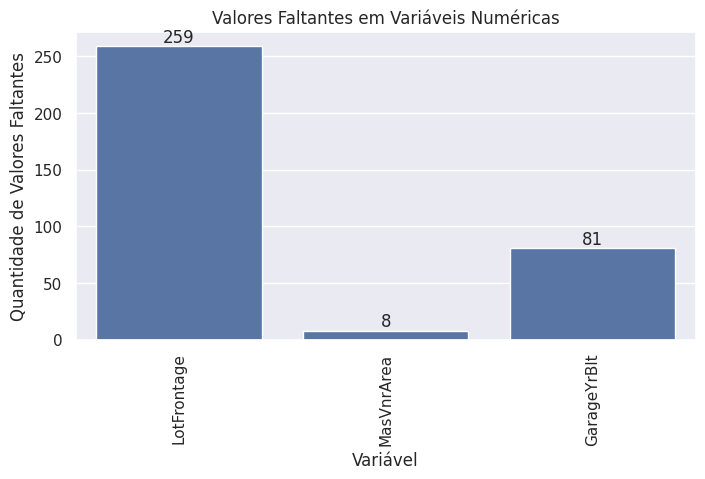

In [55]:
# Selecionar apenas as colunas numéricas
numeric_cols = data.select_dtypes(include='number').columns

# Calcular a quantidade de valores faltantes em cada coluna numérica
missing_values = data[numeric_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Quantidade de Valores Faltantes')
plt.title('Valores Faltantes em Variáveis Numéricas')

# Adicionar a legenda com os valores exatos
for i, value in enumerate(missing_values.values):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
plt.show()


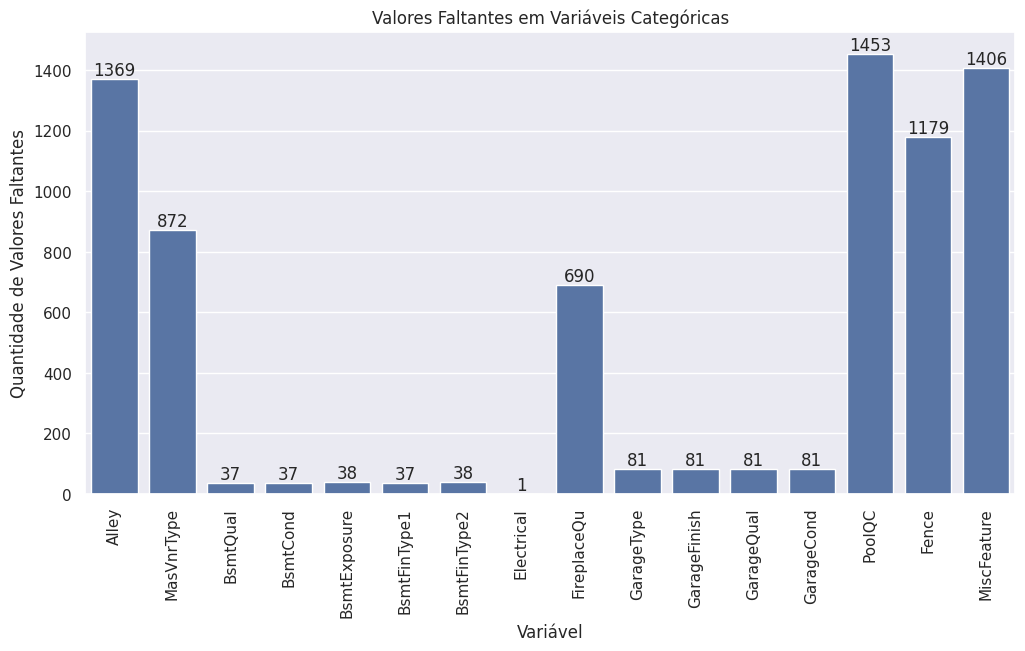

In [56]:
# Selecionar apenas as colunas categóricas (objetos)
object_cols = data.select_dtypes(include='object').columns

# Calcular a quantidade de valores faltantes em cada coluna categórica
missing_values = data[object_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Quantidade de Valores Faltantes')
plt.title('Valores Faltantes em Variáveis Categóricas')

# Adicionar a legenda com os valores exatos
for i, value in enumerate(missing_values.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()


# Verificando correlações com a coluna 'SalePrice'

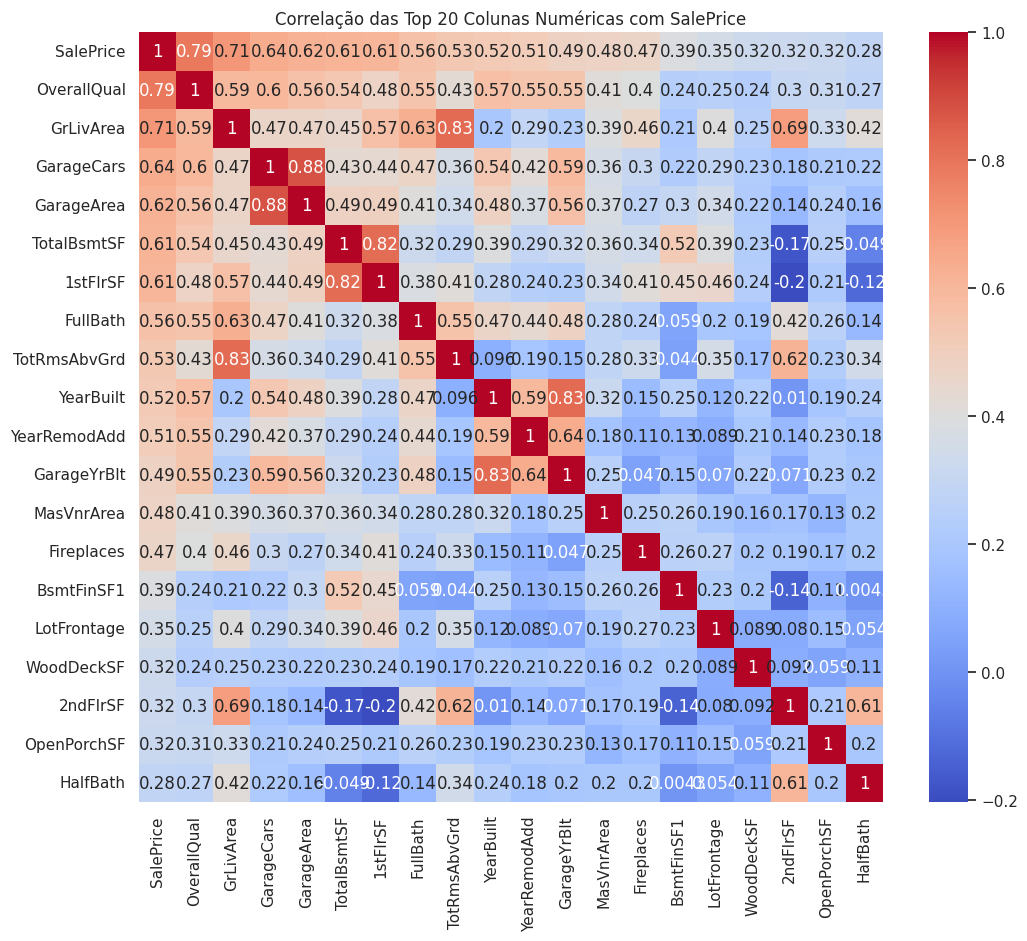

In [57]:
# Selecionar as colunas numéricas
numeric_columns = data.select_dtypes(include='number')

# Calcular a matriz de correlação
corr_matrix_numeric = numeric_columns.corr()

# Selecionar as 20 maiores correlações com a coluna "SalePrice"
top_corr_numeric = corr_matrix_numeric['SalePrice'].sort_values(ascending=False).head(20)

# Filtrar a matriz de correlação com as colunas selecionadas
corr_matrix_top_numeric = numeric_columns[top_corr_numeric.index].corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))

# Criar o mapa de calor
sns.heatmap(corr_matrix_top_numeric, annot=True, cmap='coolwarm')

# Configurar o título do gráfico
plt.title('Correlação das Top 20 Colunas Numéricas com SalePrice')

# Exibir o gráfico
plt.show()


# Análise de outlier

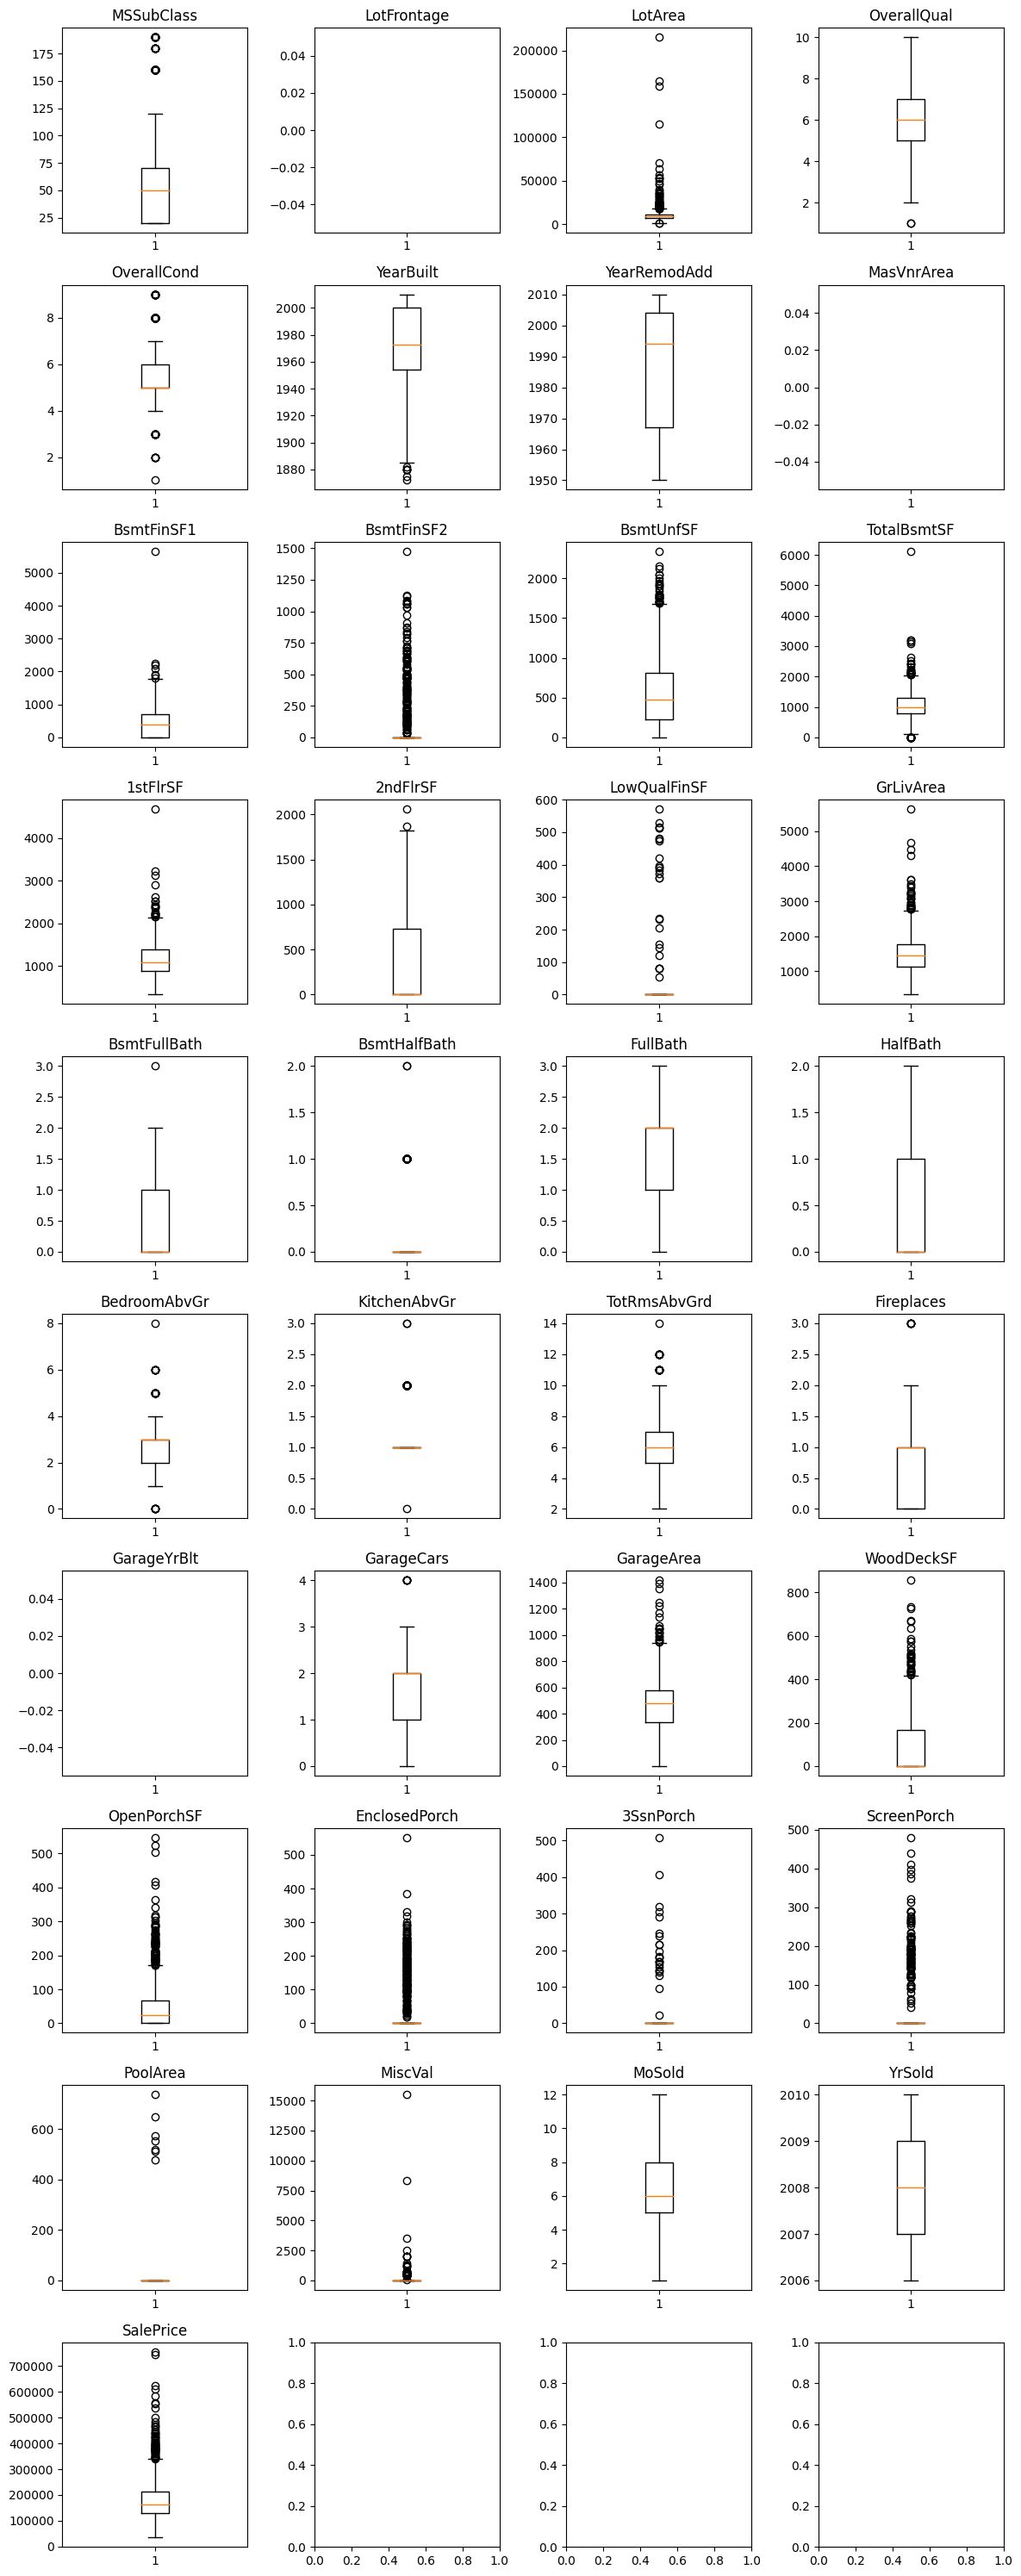

In [13]:
# Selecionar apenas as colunas numéricas para análise
colunas_numericas = data.select_dtypes(include='number').columns

# Calcular as dimensões da matriz de subplots
num_cols = len(colunas_numericas)
num_rows = (num_cols - 1) // 4 + 1

# Criar a matriz de subplots
fig, axs = plt.subplots(num_rows, 4, figsize=(12, num_rows * 3))

# Gerar os gráficos boxplot para cada coluna numérica
for i, coluna in enumerate(colunas_numericas):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    ax.boxplot(data[coluna])
    ax.set_title(coluna)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


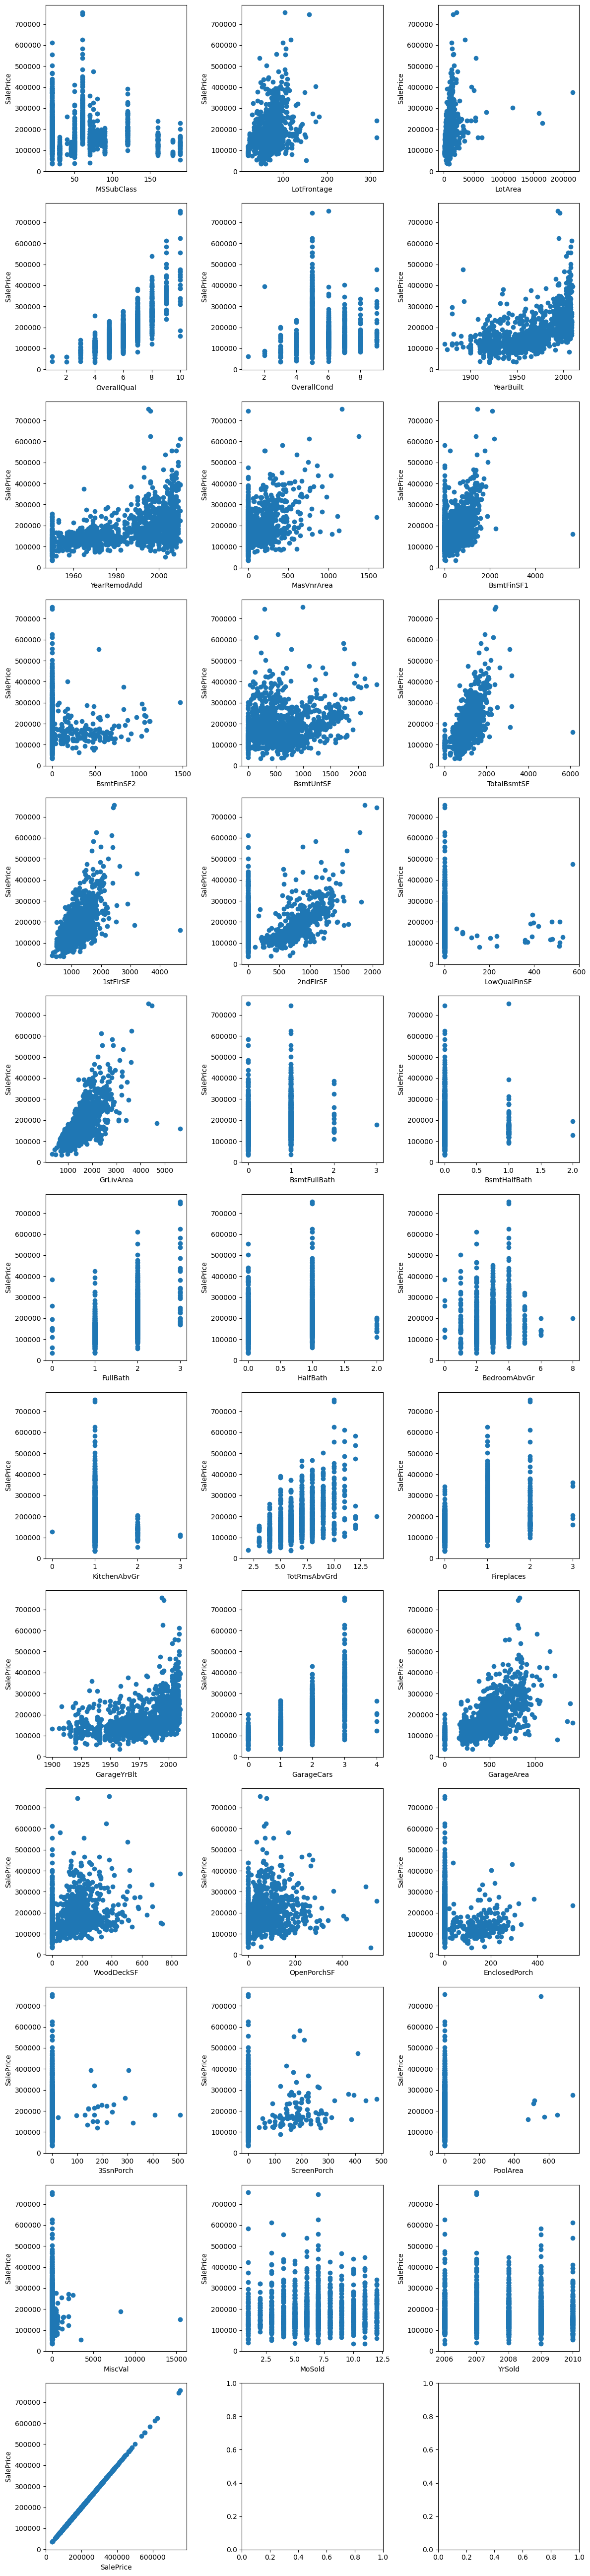

In [12]:
# Selecionar apenas as colunas numéricas para análise
colunas_numericas = data.select_dtypes(include='number').columns

# Calcular as dimensões da matriz de subplots
num_cols = len(colunas_numericas)
num_rows = (num_cols - 1) // 3 + 1

# Criar a matriz de subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))

# Gerar os gráficos de dispersão para cada coluna numérica em relação à coluna 'SalePrice'
for i, coluna in enumerate(colunas_numericas):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.scatter(data[coluna], data['SalePrice'])
    ax.set_xlabel(coluna)
    ax.set_ylabel('SalePrice')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


In [14]:
colunas_numericas = data.select_dtypes(include='number').columns

# Verificar as colunas com possíveis distorções
colunas_distorcidas = []
for coluna in colunas_numericas:
    # Verificar se existem outliers
    limite_inferior = data[coluna].mean() - 3 * data[coluna].std()
    limite_superior = data[coluna].mean() + 3 * data[coluna].std()
    outliers = data[(data[coluna] < limite_inferior) | (data[coluna] > limite_superior)]
    
    # Verificar a assimetria da distribuição
    assimetria = data[coluna].skew()
    
    # Verificar se a coluna está distorcida
    if len(outliers) > 0 or abs(assimetria) > 1:
        colunas_distorcidas.append(coluna)

# Exibir as colunas com possíveis distorções
print("Colunas com possíveis distorções:")
for coluna in colunas_distorcidas:
    print(coluna)

Colunas com possíveis distorções:
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice


# Remoção de Outliers

In [15]:
# Calcular estatísticas do SalePrice
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers
data_filtered = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]

# Verificar o número de registros remanescentes
num_records_filtered = data_filtered.shape[0]
num_records_total = data.shape[0]
num_outliers_removed = num_records_total - num_records_filtered

# Imprimir informações
print(f"Número de outliers removidos: {num_outliers_removed}")
print(f"Número de registros remanescentes: {num_records_filtered}")
data_filtered

Número de outliers removidos: 61
Número de registros remanescentes: 1399


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Visualizando distribuição dos dados númericos

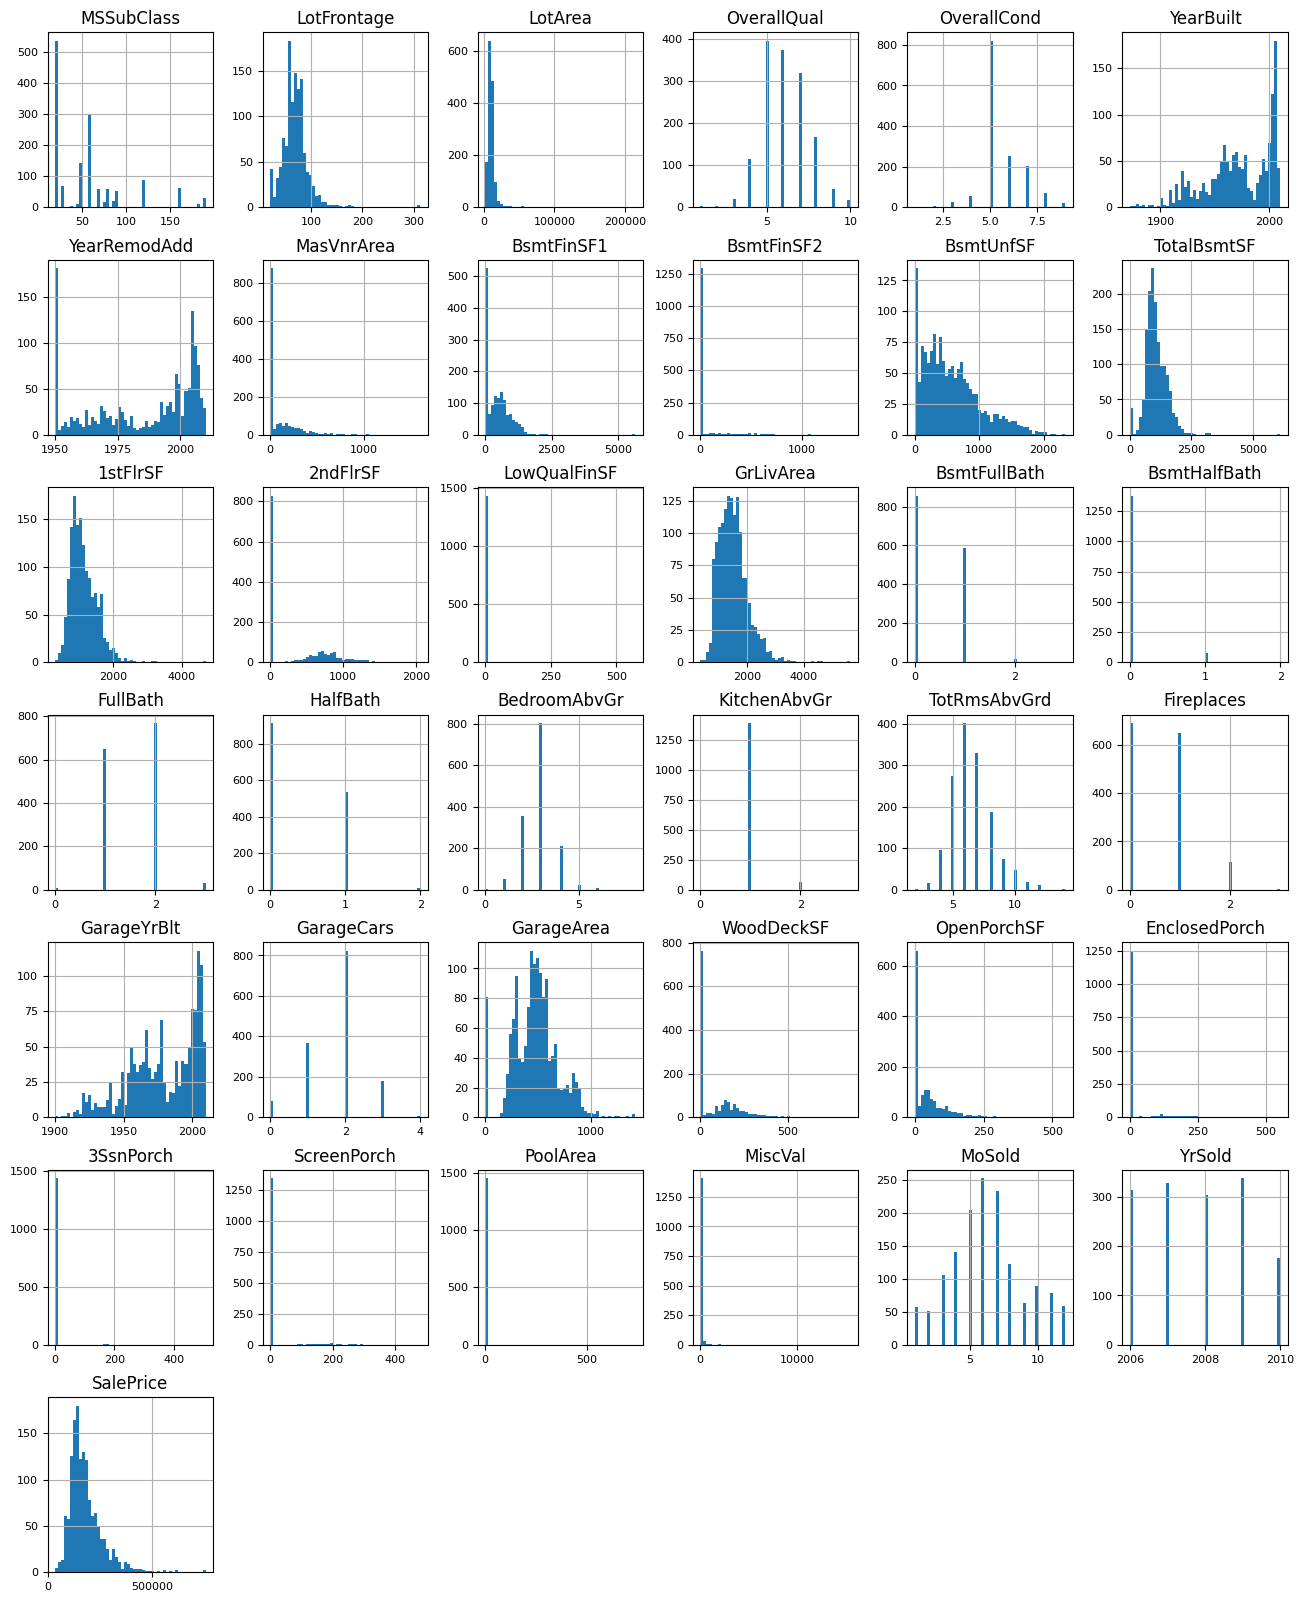

In [16]:
colunas_numericas = data.select_dtypes(include = ['float64', 'int64'])
colunas_numericas.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Removendo colunas

Após a análise exploratória de dados, resolvemos excluir colunas com muitos dados faltantes

In [17]:
# Remoção colunas 
colunas_remover = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
data = data.drop(colunas_remover, axis=1)


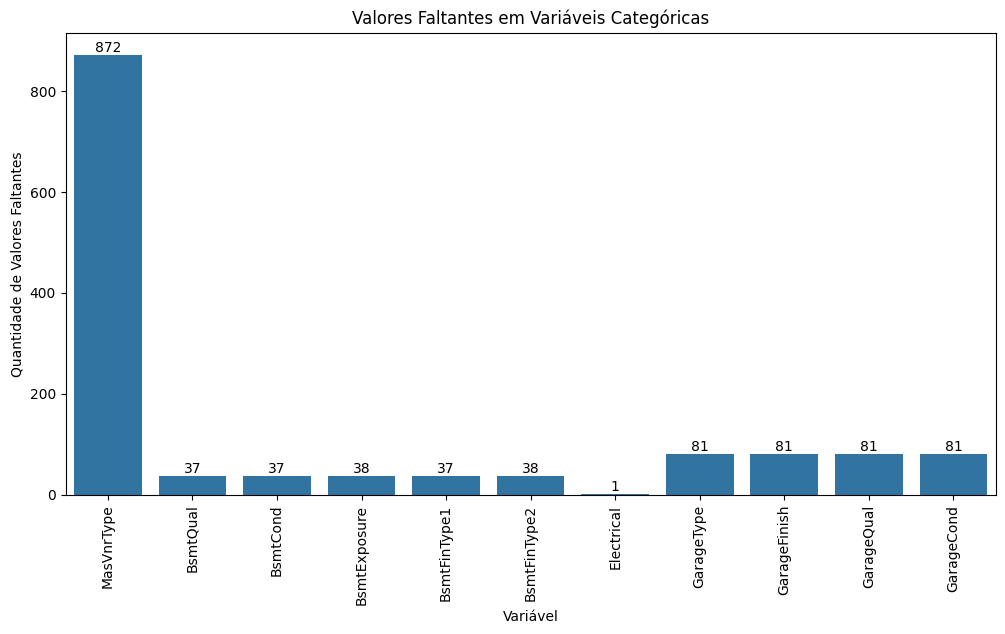

In [18]:
# Selecionar apenas as colunas categóricas (objetos)
object_cols = data.select_dtypes(include='object').columns

# Calcular a quantidade de valores faltantes em cada coluna categórica
missing_values = data[object_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Quantidade de Valores Faltantes')
plt.title('Valores Faltantes em Variáveis Categóricas')

# Adicionar a legenda com os valores exatos
for i, value in enumerate(missing_values.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

# Preenchendo dados faltantes

In [19]:
# Preenchendo dados das colunas númericas

# Identificar as colunas inteiras com dados faltantes
colunas_inteiras = data.select_dtypes(include=['int']).columns
colunas_inteiras_faltantes = data[colunas_inteiras].isnull().any()

# Identificar as colunas float com dados faltantes
colunas_float = data.select_dtypes(include=['float']).columns
colunas_float_faltantes = data[colunas_float].isnull().any()

# Preencher colunas inteiras com a média
data[colunas_inteiras] = data[colunas_inteiras].fillna(data[colunas_inteiras].mean())

# Preencher colunas float com a média
data[colunas_float] = data[colunas_float].fillna(data[colunas_float].mean())

In [20]:
# Preenchendo dados das colunas objetos

data['MSZoning'].fillna('RL', inplace=True)
data['Utilities'].fillna('AllPub', inplace=True)
data['MasVnrType'].fillna('None', inplace=True)
data['BsmtQual'].fillna('TA', inplace=True)
data['BsmtCond'].fillna('No', inplace=True)
data['BsmtExposure'].fillna('GLQ', inplace=True)
data['BsmtFinType1'].fillna('Unf', inplace=True)
data['BsmtFinType2'].fillna('Unf', inplace=True)
data['KitchenQual'].fillna('TA', inplace=True)
data['Functional'].fillna('Min2', inplace=True)
data['GarageType'].fillna('Attchd', inplace=True)
data['GarageFinish'].fillna('Unf', inplace=True)
data['GarageQual'].fillna('TA', inplace=True)
data['GarageCond'].fillna('TA', inplace=True)
data['SaleType'].fillna('WD', inplace=True)
data['Electrical'].fillna('SBrkr', inplace=True)



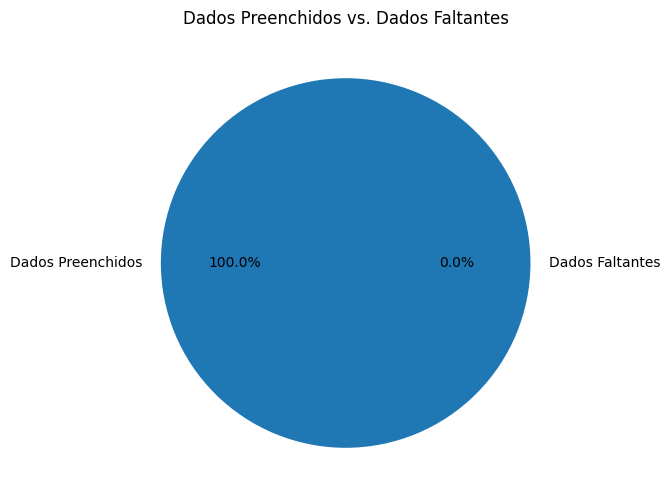

In [21]:
# Calcular a quantidade total de dados
total_data = data.size

# Calcular a quantidade de campos preenchidos
filled_data = data.count().sum()

# Calcular a quantidade de campos vazios
missing_data = total_data - filled_data

# Criar lista de rótulos para o gráfico de pizza
labels = ['Dados Preenchidos', 'Dados Faltantes']

# Criar lista de valores para o gráfico de pizza
values = [filled_data, missing_data]

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Dados Preenchidos vs. Dados Faltantes')
plt.show()

# 2 e 3 - Aprendizagem Supervisionada

## Aplicação do LabelEncoder

In [22]:
# Crie uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Itere sobre as colunas com objetos e aplique o Label Encoder
for col in data.select_dtypes(include='object'):
    data[col] = label_encoder.fit_transform(data[col])

# Verifique as colunas transformadas
print(data.head())


   MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0  

## Modelo de Regressão Linear

In [23]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir as métricas de avaliação
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 21665.59624730965
Root Mean Squared Error (RMSE): 34367.661101430764
R-squared (R2): 0.8460122688815936


# Classificação

In [24]:
# Definir um limite de preço para classificação (exemplo: 200.000)
limite_preco = 200000

# Criar a variável de saída binária
y_class = np.where(data['SalePrice'] > limite_preco, 1, 0)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Criar o modelo de classificação (por exemplo, Logistic Regression)
model = LogisticRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir as métricas de avaliação
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("---------------")

for idx, pred in enumerate(y_pred):
    if idx >= 10:
        break
    if pred == 1:
        print(f"Casa {idx} foi vendida por um preço alto")
    else:
        print(f"Casa {idx} foi vendida por um preço baixo")




Accuracy: 0.910958904109589
Precision: 0.9242424242424242
Recall: 0.7439024390243902
---------------
Casa 0 foi vendida por um preço baixo
Casa 1 foi vendida por um preço alto
Casa 2 foi vendida por um preço baixo
Casa 3 foi vendida por um preço baixo
Casa 4 foi vendida por um preço alto
Casa 5 foi vendida por um preço baixo
Casa 6 foi vendida por um preço baixo
Casa 7 foi vendida por um preço baixo
Casa 8 foi vendida por um preço baixo
Casa 9 foi vendida por um preço baixo


/home/filipe/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4, 5 e 6 - Aprendizagem não Supervisionada

## Clusterização

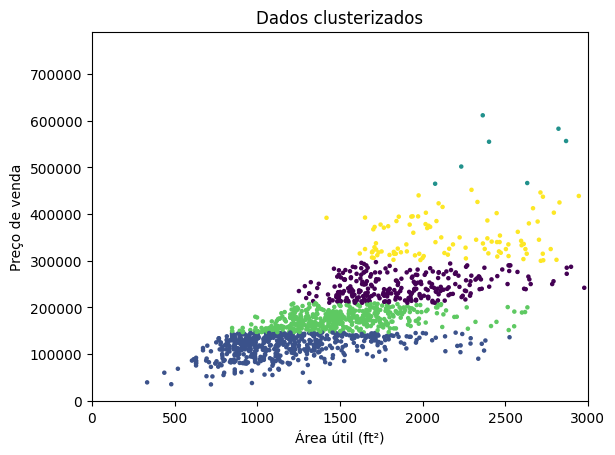

In [25]:
df_cleaned_kmeans = data

# Criar o modelo K-means com 5 clusters e definir n_init como 10
kmeans = KMeans(n_clusters=5, n_init=10)

# Treinar o modelo com os dados
kmeans.fit(df_cleaned_kmeans)

# Adicionar as previsões do modelo aos dados
df_cleaned_kmeans['cluster'] = kmeans.predict(df_cleaned_kmeans)

# Plotar os dados com as cores dos clusters
plt.scatter(df_cleaned_kmeans['GrLivArea'], df_cleaned_kmeans['SalePrice'], c=df_cleaned_kmeans['cluster'], s=5)

plt.xlim(0, 3000)
plt.xlabel('Área útil (ft²)')
plt.ylabel('Preço de venda')
plt.title('Dados clusterizados')
plt.show()

## Redução de dimensionalidade

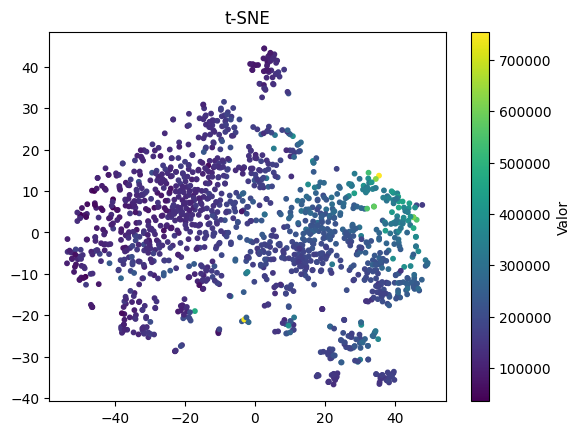

In [26]:
# Carregando o dataset
caracteristicas = data.drop('SalePrice', axis=1)
valores = data['SalePrice']

X, y = caracteristicas, valores
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Definindo o modelo e ajustando-o aos dados
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_norm)

# Plotando os resultados
plt.scatter(X_tsne[:, 0], X_tsne[:, 1] , c=y, s=10)
plt.colorbar(label='Valor')
plt.title('t-SNE')
plt.show()

## Análise de Outliers (Local Outlier Factor)
### Dados anteriores à remoção dos Outliers

In [31]:
# Atribuir conjunto de dados
X = data

# Criação de uma instância do algoritmo LOF
lof = LocalOutlierFactor(n_neighbors=2)

# Ajuste do modelo aos dados e previsão dos rótulos dos outliers
y_pred = lof.fit_predict(X)

# Contagem dos valores
contagem = np.bincount(y_pred == -1)

# Exibição da contagem (-1 indica um outlier)
print(f"Quantidade de outliers: {contagem[1]}")
print(f"Quantidade de amostras não outliers: {contagem[0]}")

Quantidade de outliers: 105
Quantidade de amostras não outliers: 1355


# 7 - Visualização de resultados

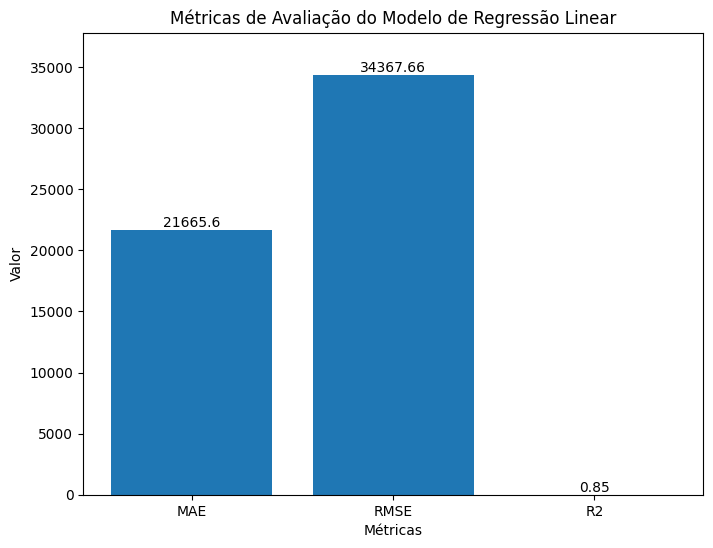

In [32]:
# Métricas de avaliação
metrics = ['MAE', 'RMSE', 'R2']
values = [mae, rmse, r2]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(metrics, values)

# Adicionar rótulos aos valores das barras
for i, value in enumerate(values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Configurar características do gráfico
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas de Avaliação do Modelo de Regressão Linear')
plt.ylim(0, max(values) * 1.1)

# Exibir o gráfico
plt.show()
